# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [39]:
# подключить необходимые библиотеки

# Ваш код здесь

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2 as pg
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

In [2]:
# считать данные

# Ваш код здесь

sql_request = '''
select
  da.agreement_rk,
  da.target, 
  dc.age, 
  dc.socstatus_work_fl, 
  dc.socstatus_pens_fl,
  dc.gender,
  dc.child_total,
  dc.dependants,
  ds.personal_income,
  dl.id_loan,
  dcl.closed_fl
from d_agreement da, d_clients dc, d_salary ds, d_loan dl, d_close_loan dcl
where 
  (dc.id = da.id_client) and 
  (ds.id_client = dc.id) and 
  (dl.id_client = dc.id) and 
  (dcl.id_loan = dl.id_loan)
'''

In [3]:
class SQL:
    def __init__(self, login) -> None:
        self.login = login
        self.connection = self.create_connection()
        self.connection.autocommit = True
        self.cursor = self.connection.cursor()

    def create_connection(self):
        connection = None
        try:
            connection = pg.connect(**self.login)
            print("Connection to PostgreSQL DB successful")
        except pg.OperationalError as e:
            print(f"The error '{e}' occurred")
        return connection

    def request(self, query):
        self.cursor.execute(query)
        return pd.DataFrame(self.cursor.fetchall(), columns=[el[0] for el in self.cursor.description])

    def close(self):
        self.connection.close()

login = {
    'database': 'module_6',
    'user': 'postgres',
    'password': '12345',
    'host': 'localhost',
    'port': '5432',
}

db = SQL(login)
data = db.request(sql_request)
db.close()

Connection to PostgreSQL DB successful


In [4]:
data

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,id_loan,closed_fl
0,59910150,0,49,2,1,1,2,1,5000.0,1753790658,1
1,59910150,0,49,2,1,1,2,1,5000.0,1753790658,1
2,59910150,0,49,2,1,1,2,1,5000.0,1753790658,1
3,59910150,0,49,2,1,1,2,1,5000.0,1753790658,1
4,59910150,0,49,2,1,1,2,1,5000.0,1753790658,1
...,...,...,...,...,...,...,...,...,...,...,...
172275,75291960,0,60,1,2,1,2,0,4500.0,1753811782,0
172276,75292242,0,37,2,1,0,2,0,20000.0,1753811783,0
172277,75292242,0,37,2,1,0,2,0,20000.0,1753811783,0
172278,75292242,0,37,2,1,0,2,0,20000.0,1753811783,0


In [5]:
df = data.copy()

In [6]:
df.isna().sum()

agreement_rk         0
target               0
age                  0
socstatus_work_fl    0
socstatus_pens_fl    0
gender               0
child_total          0
dependants           0
personal_income      0
id_loan              0
closed_fl            0
dtype: int64

In [7]:
df = df.drop_duplicates()
df

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,id_loan,closed_fl
0,59910150,0,49,2,1,1,2,1,5000.0,1753790658,1
8,59910230,0,32,2,1,1,3,3,12000.0,1753790659,1
12,59910525,0,52,2,1,1,4,0,9000.0,1753790660,1
16,59910525,0,52,2,1,1,4,0,9000.0,1753790661,0
20,59910803,0,39,2,1,1,1,1,25000.0,1753790662,1
...,...,...,...,...,...,...,...,...,...,...,...
86120,75291424,0,25,2,1,0,1,1,12000.0,1753811779,1
86124,75291888,0,51,2,1,1,2,0,10000.0,1753811780,0
86128,75291923,0,22,2,1,1,1,1,6000.0,1753811781,0
86132,75291960,0,60,1,2,1,2,0,4500.0,1753811782,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21126 entries, 0 to 86136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   agreement_rk       21126 non-null  object
 1   target             21126 non-null  object
 2   age                21126 non-null  object
 3   socstatus_work_fl  21126 non-null  object
 4   socstatus_pens_fl  21126 non-null  object
 5   gender             21126 non-null  object
 6   child_total        21126 non-null  object
 7   dependants         21126 non-null  object
 8   personal_income    21126 non-null  object
 9   id_loan            21126 non-null  object
 10  closed_fl          21126 non-null  object
dtypes: object(11)
memory usage: 1.9+ MB


In [9]:
df = df.apply(pd.to_numeric, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21126 entries, 0 to 86136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreement_rk       21126 non-null  float64
 1   target             21126 non-null  float64
 2   age                21126 non-null  float64
 3   socstatus_work_fl  21126 non-null  float64
 4   socstatus_pens_fl  21126 non-null  float64
 5   gender             21126 non-null  float64
 6   child_total        21126 non-null  float64
 7   dependants         21126 non-null  float64
 8   personal_income    21126 non-null  float64
 9   id_loan            21126 non-null  float64
 10  closed_fl          21126 non-null  float64
dtypes: float64(11)
memory usage: 1.9 MB


In [11]:
df = df.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21126 entries, 0 to 86136
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   agreement_rk       21126 non-null  int32
 1   target             21126 non-null  int32
 2   age                21126 non-null  int32
 3   socstatus_work_fl  21126 non-null  int32
 4   socstatus_pens_fl  21126 non-null  int32
 5   gender             21126 non-null  int32
 6   child_total        21126 non-null  int32
 7   dependants         21126 non-null  int32
 8   personal_income    21126 non-null  int32
 9   id_loan            21126 non-null  int32
 10  closed_fl          21126 non-null  int32
dtypes: int32(11)
memory usage: 1.0 MB


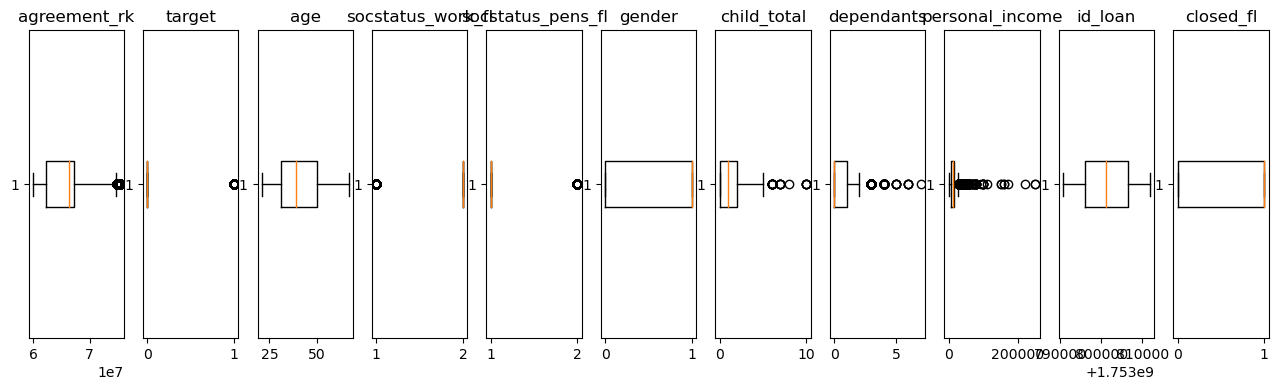

In [13]:
def boxplot_for_columns(df):
    selected_cols = df.select_dtypes(include=['int', 'float']).columns

    if len(selected_cols) > 0:
        fig, ax = plt.subplots(nrows=1, ncols=len(selected_cols), figsize=(16, 4))
        for i, col in enumerate(selected_cols):
            ax[i].boxplot(df[col], vert=False)
            ax[i].set_title(col)
        plt.show()
    else:
        print("Во фрейме данных не найдено числовых столбцов")

boxplot_for_columns(df)

In [14]:
df = df.drop(['agreement_rk', 'id_loan'], axis=1)

In [15]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

# Ваш код здесь

In [36]:
df['target'].value_counts()

target
0    18741
1     2385
Name: count, dtype: int64

<Axes: >

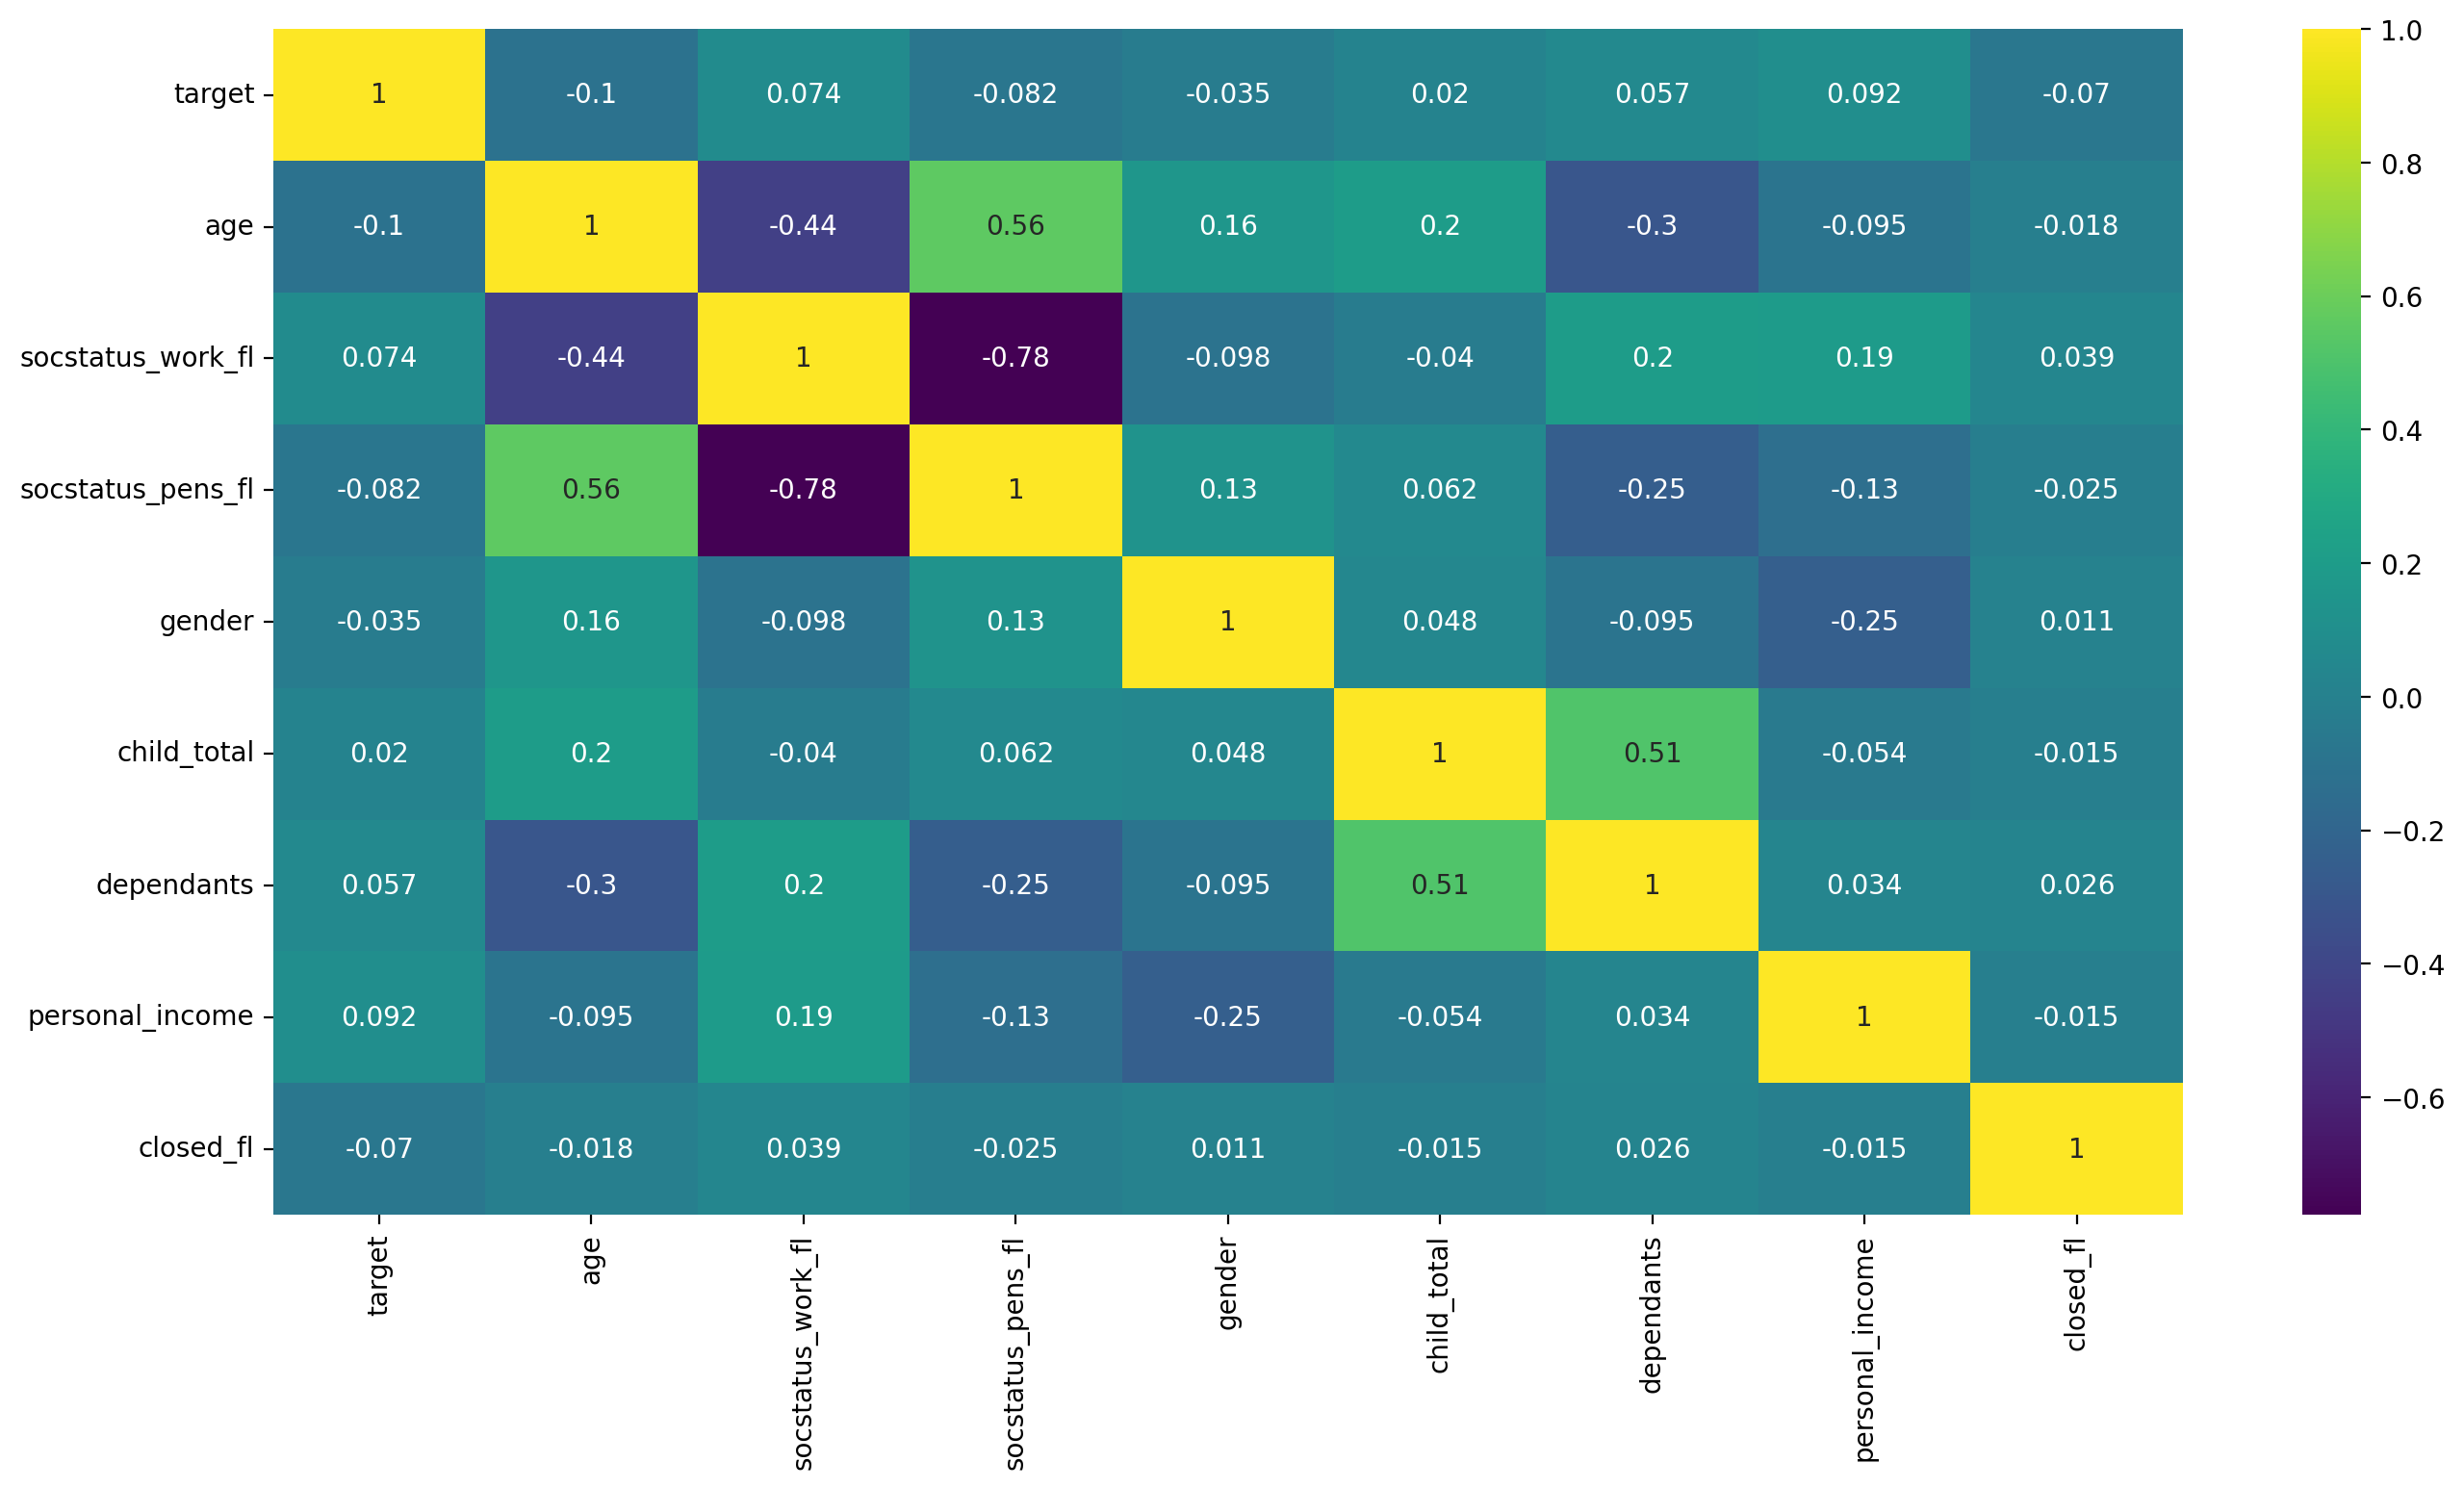

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(16,8), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

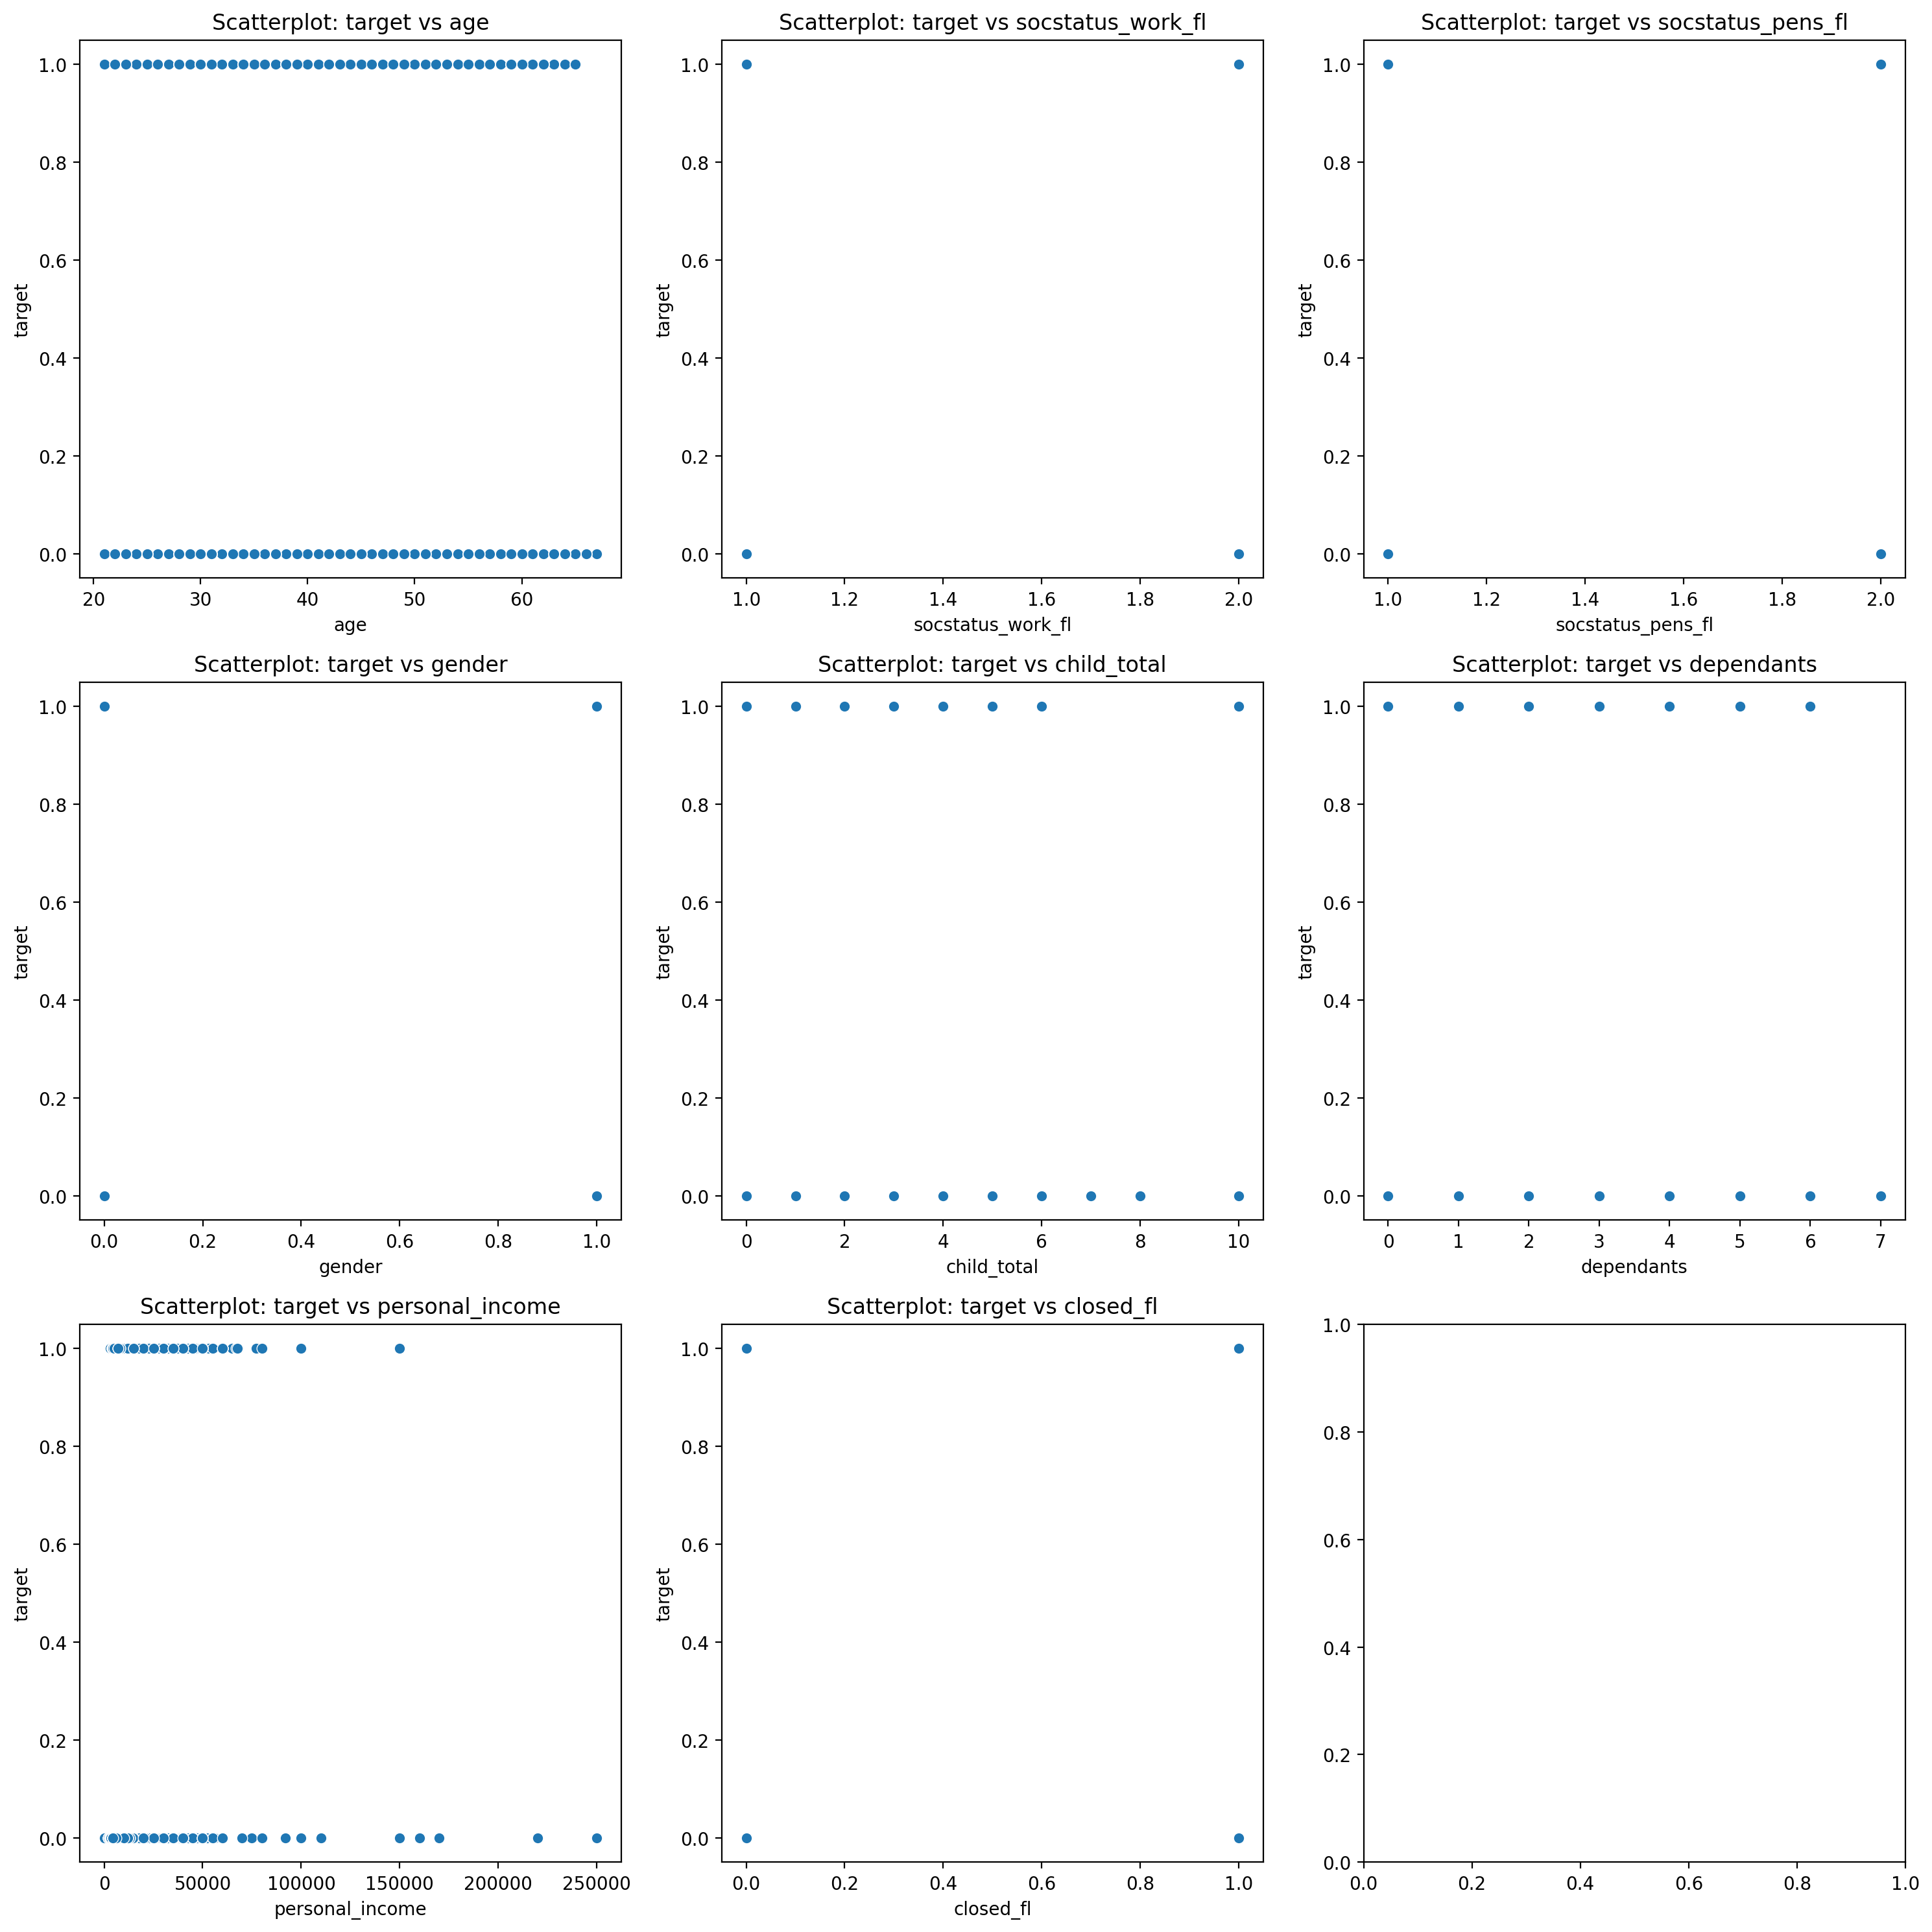

In [22]:
# Удаляем столбец с целевой переменной "target" для получения списка переменных
variables = df.drop('target', axis=1).columns

# Определяем количества строк и столбцов в сетке графиков
num_rows = len(variables) // 3 + (len(variables) % 3 > 0)
num_cols = min(3, len(variables))

# Создаем сетку графиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=200)

# Проходим по переменным и строим скаттерплоты
for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=variable, y='target', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot: target vs {variable}')

# Размещаем графики
plt.tight_layout()
plt.show()

In [23]:
# раздедлите на обучающую и тестовую выборки

# Ваш код здесь

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

minmax =  MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [26]:
# обучите модель методом ближайших соседей

# Ваш код здесь

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)

In [31]:
# проверьте качество модели с помощью F-мера

# Ваш код здесь

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5605
           1       0.25      0.07      0.10       733

    accuracy                           0.87      6338
   macro avg       0.57      0.52      0.52      6338
weighted avg       0.81      0.87      0.83      6338



In [40]:
# проверьте качество модели с помощью матрицы сопряжённостей

# Ваш код здесь

print(confusion_matrix(y_test, y_pred))

[[5459  146]
 [ 685   48]]


    # сделайте вывод о работе модели

    # Ваш текст здесь
    
Модель справилась очень плохо. Дизбаланс классов сказывается. Думаю даже настроика гиперпараметров не сильно скажется ибо разброс данных такой что разделить на группы слишком сложно. Почти схожие значения могут быть как в 0 так и в 1. Внизу попробую обучить модель без обработки выбросов

In [41]:
df1 = data.copy()
df1 = df1.drop_duplicates()
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1 = df1.drop(['agreement_rk', 'id_loan'], axis=1)

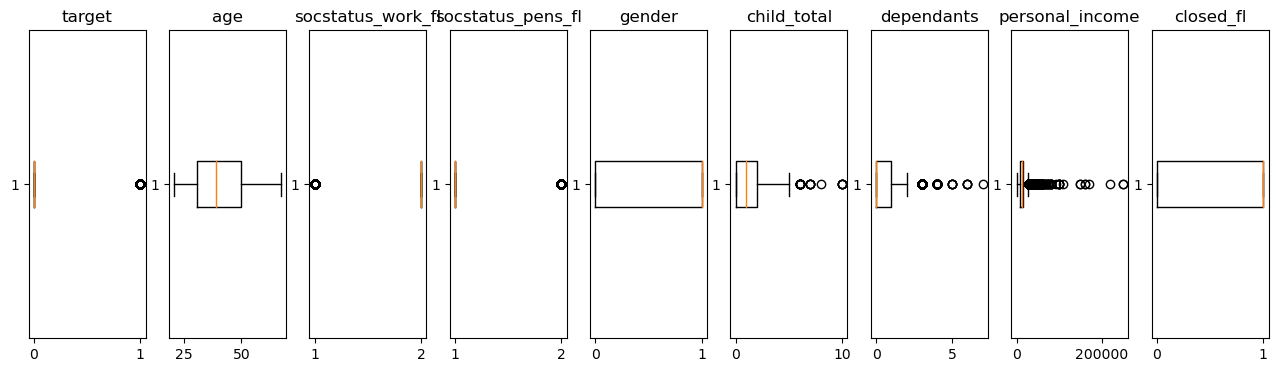

In [42]:
boxplot_for_columns(df1)

<Axes: >

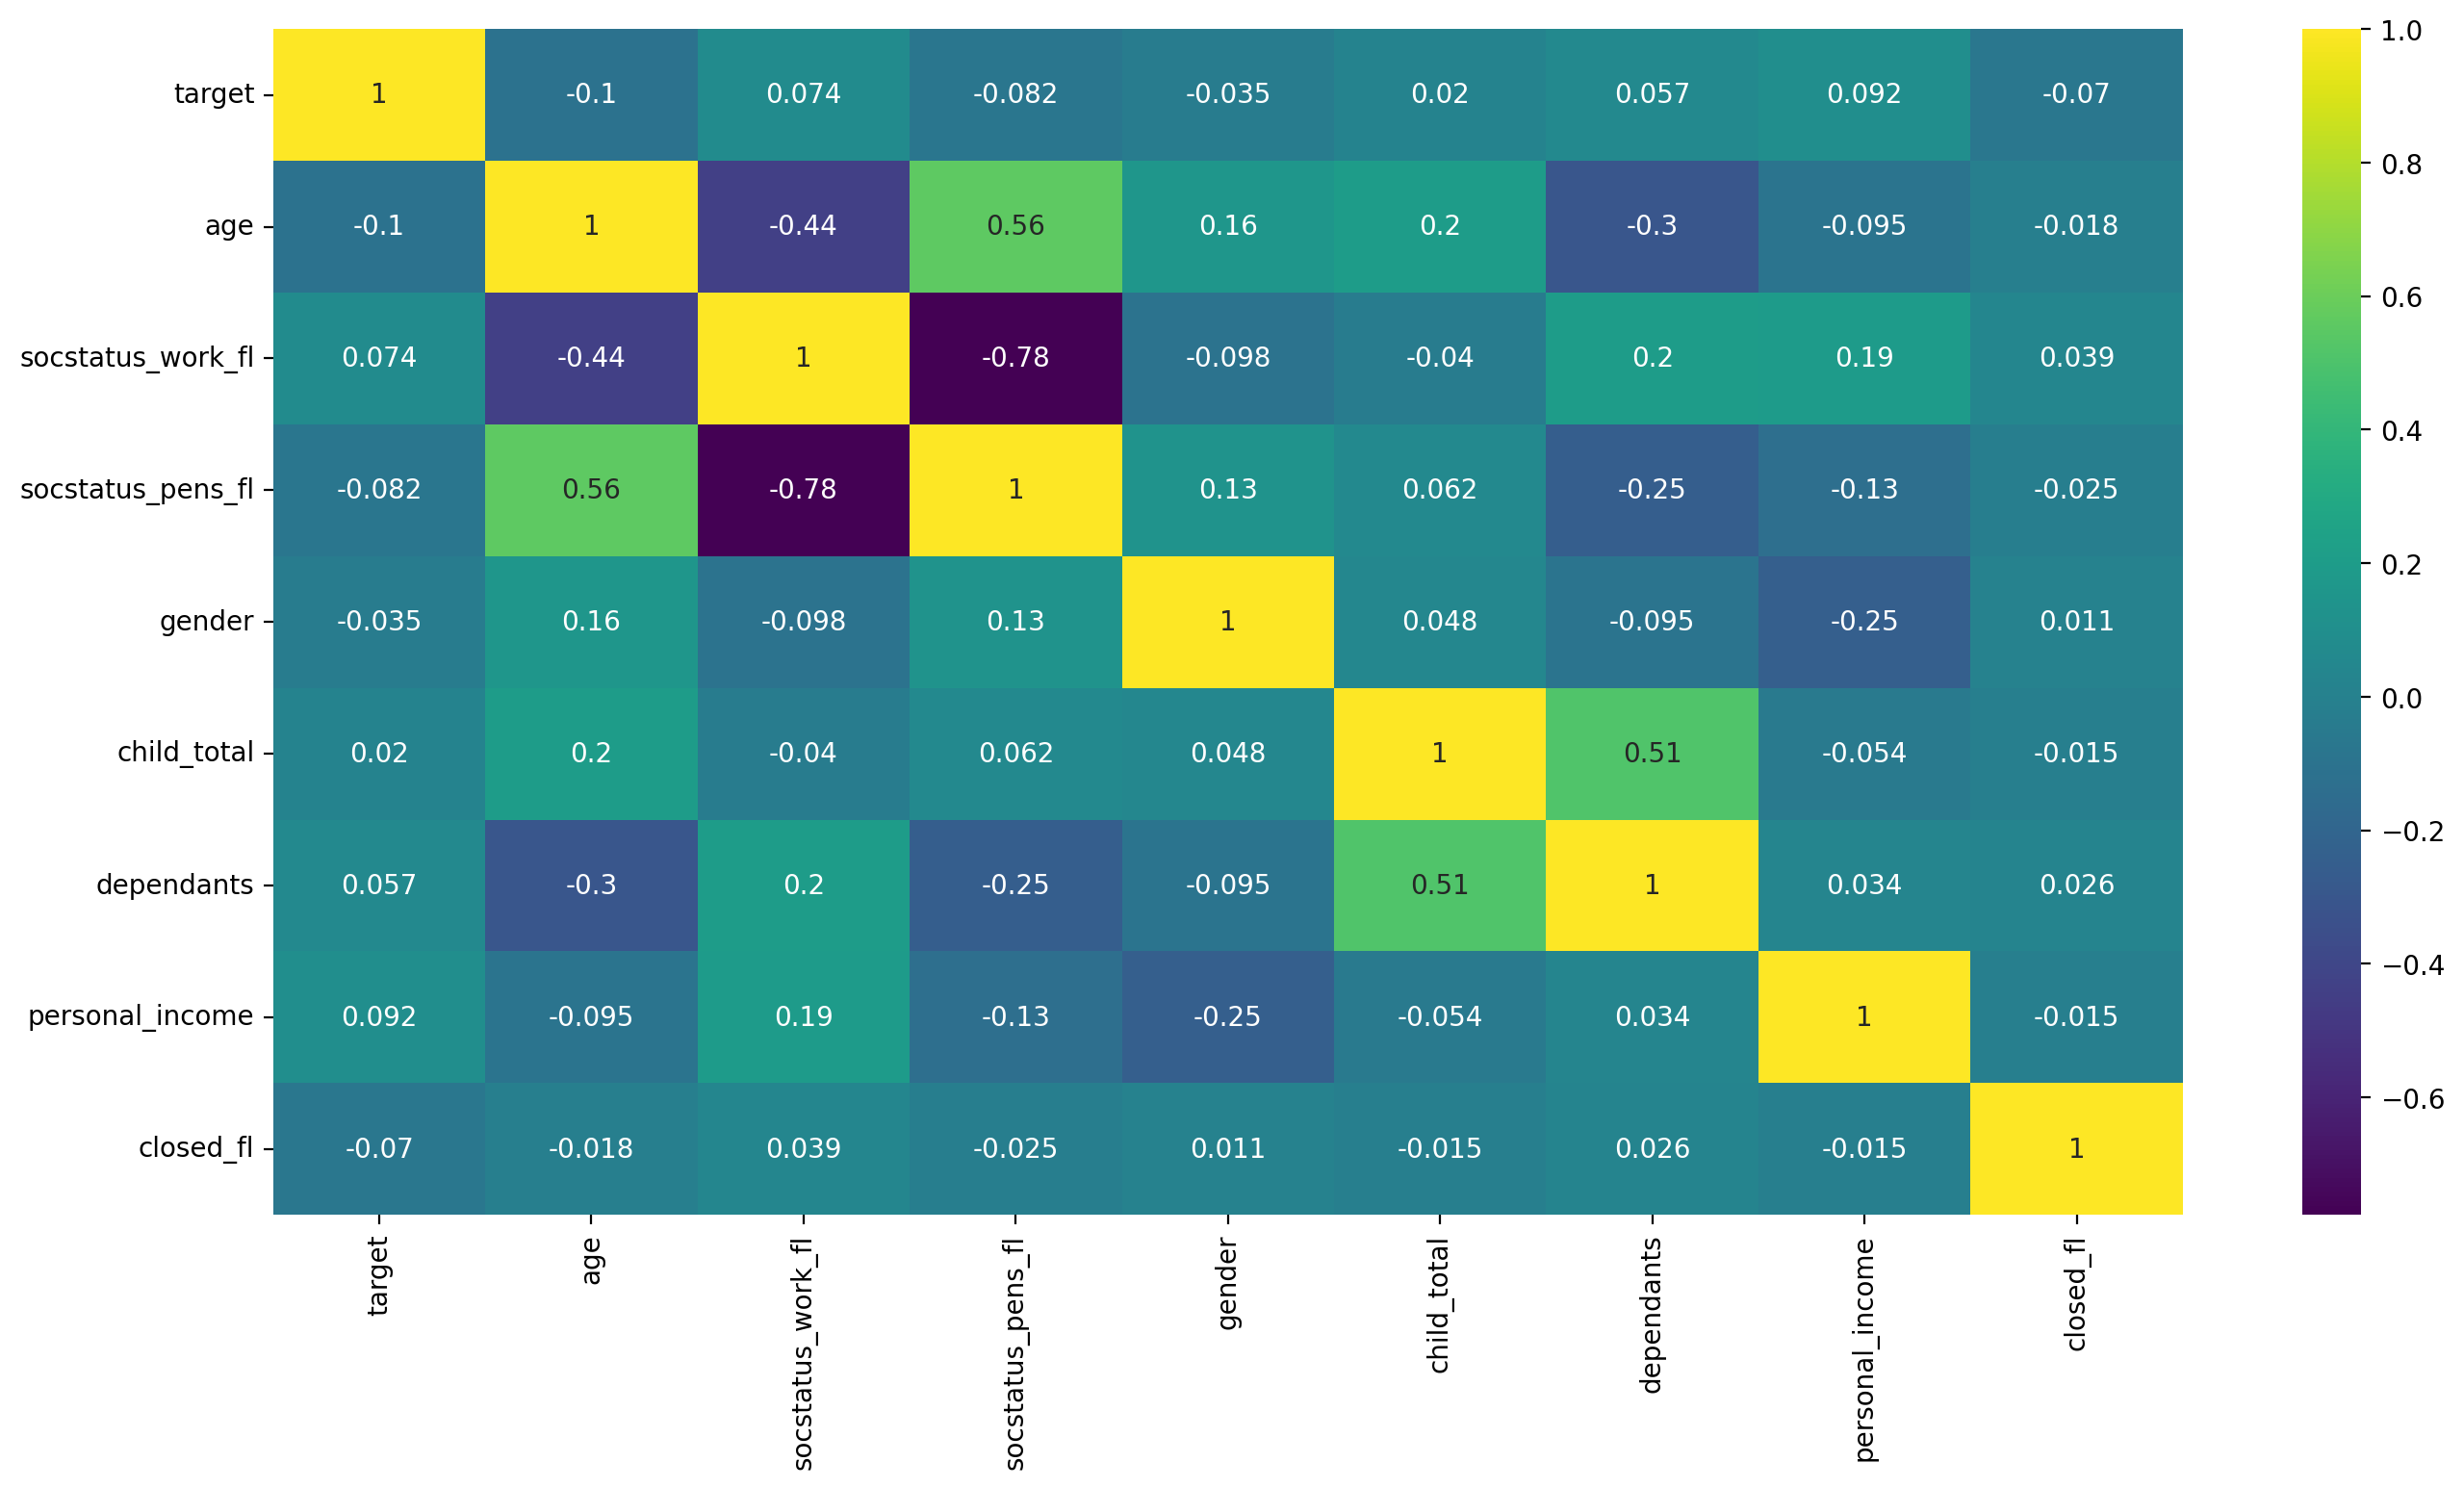

In [43]:
correlation_matrix = df1.corr()
plt.figure(figsize=(16,8), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

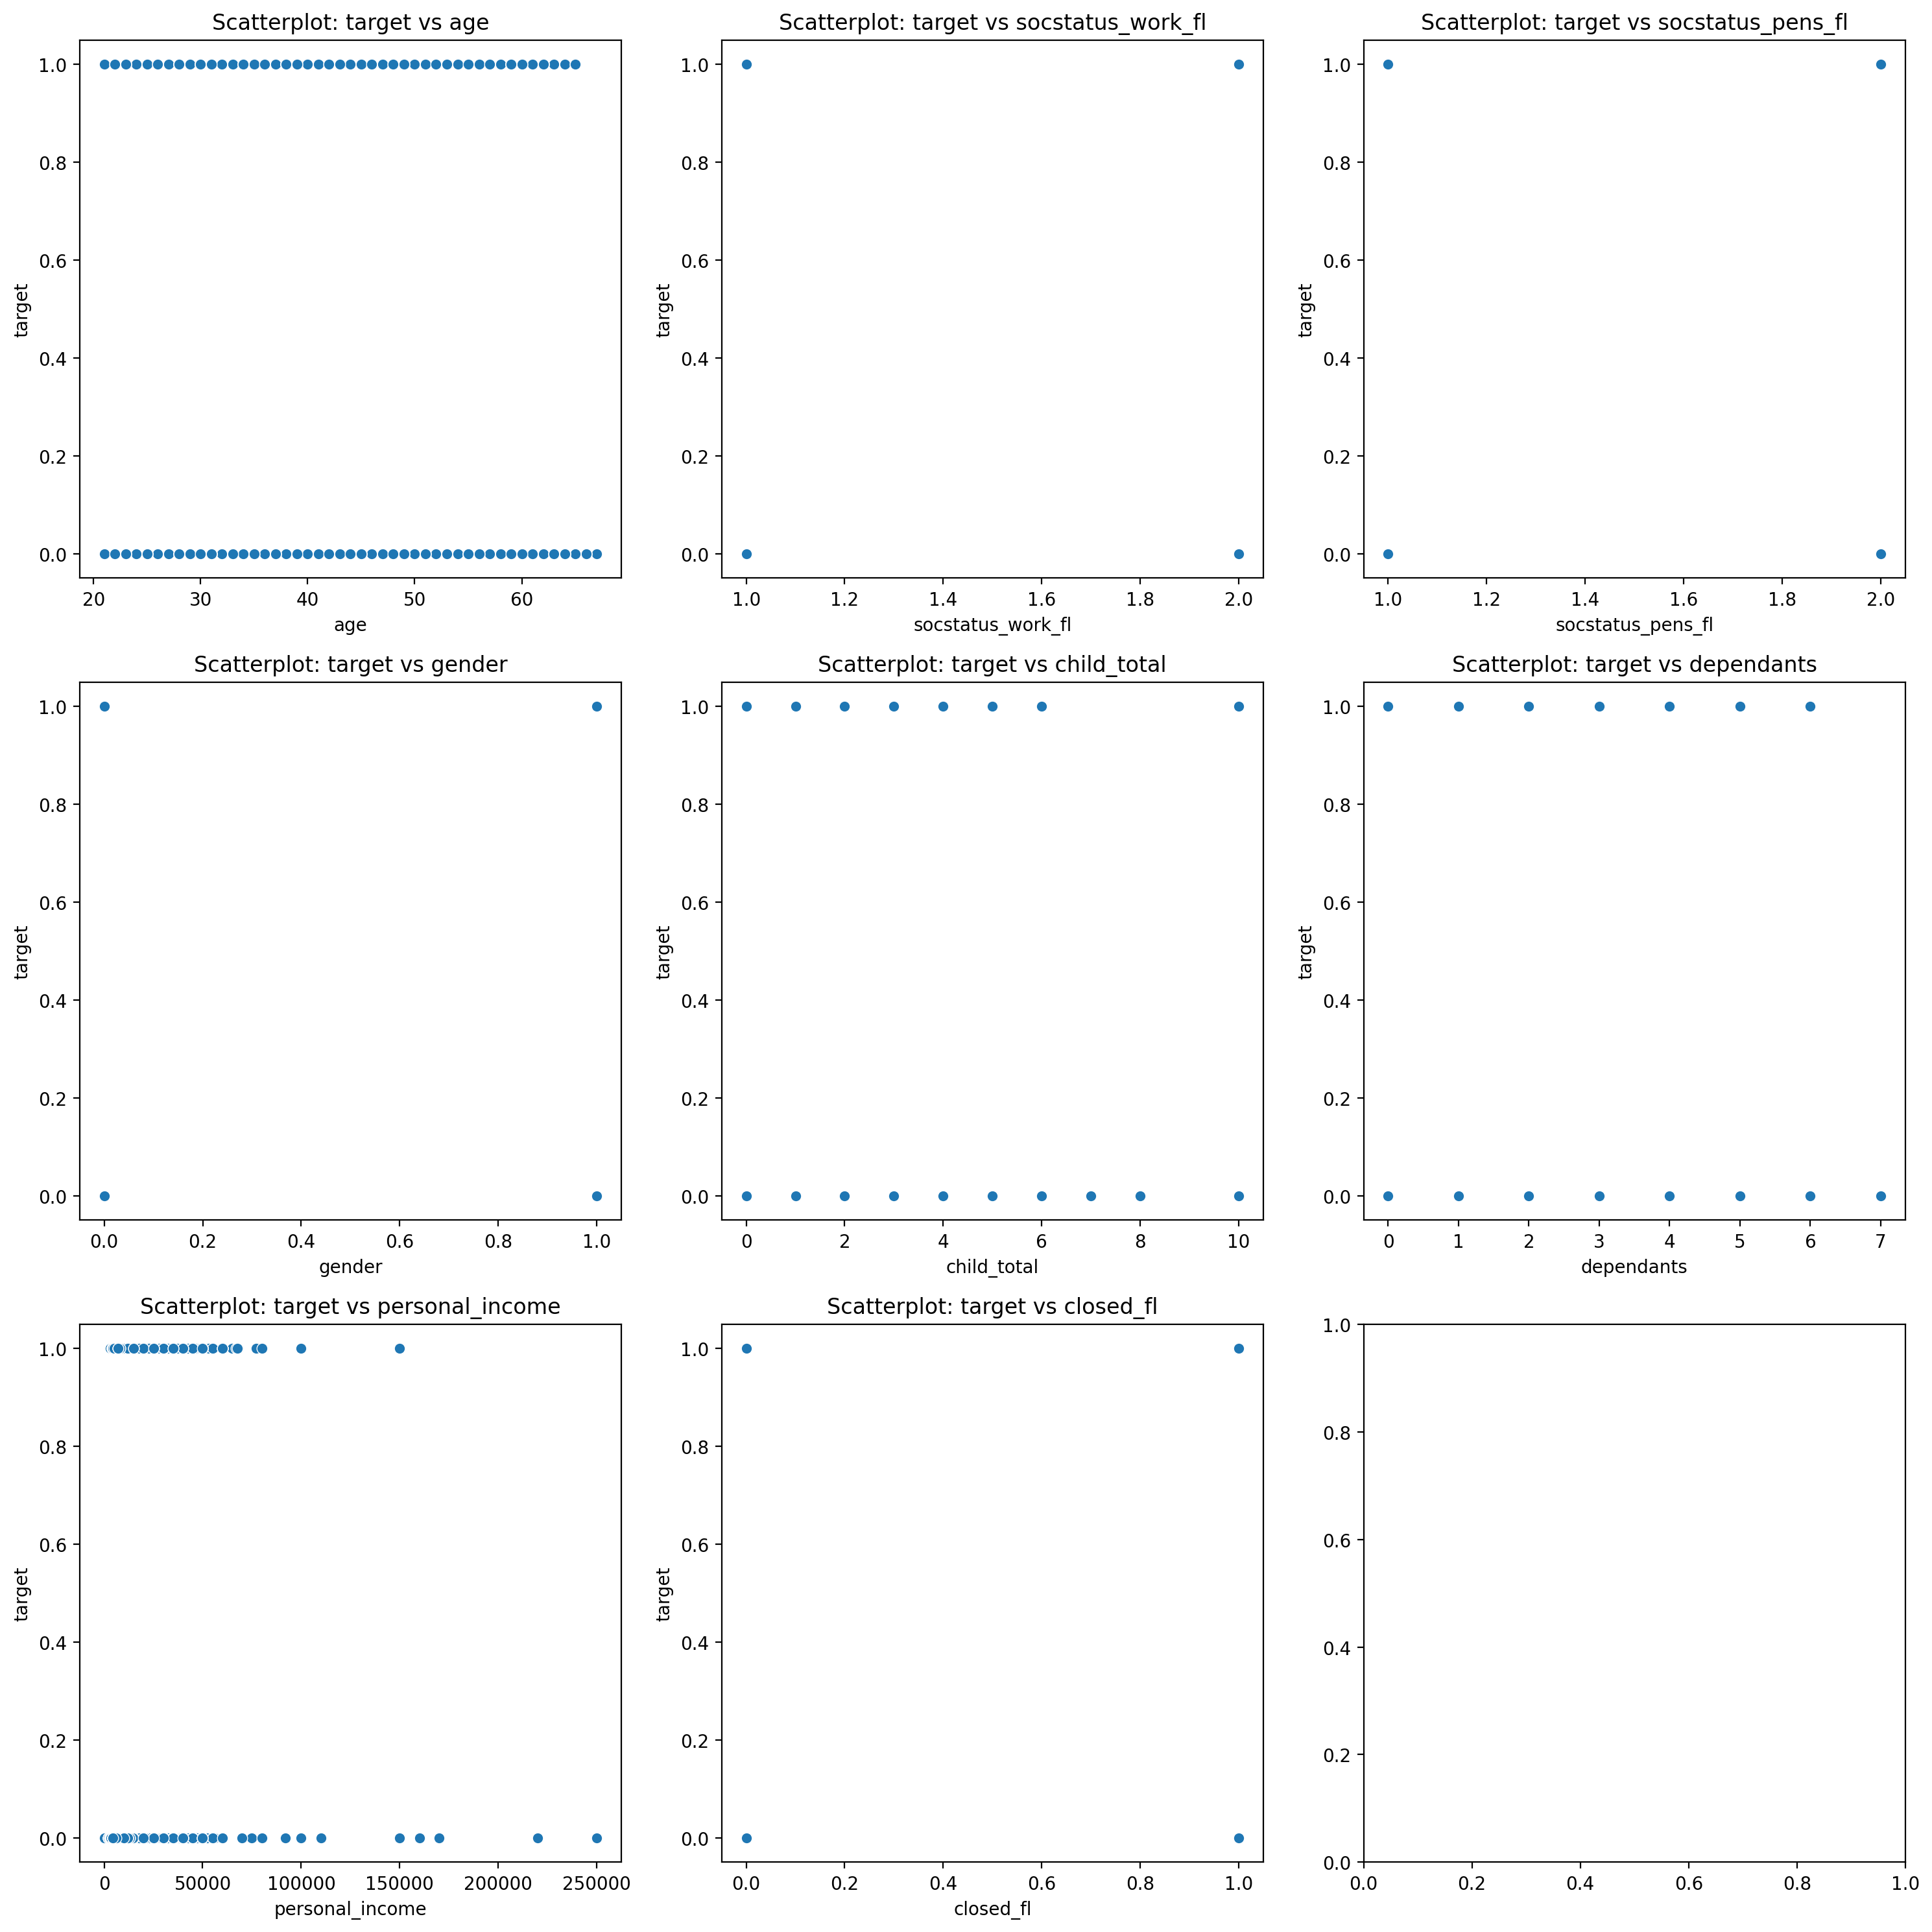

In [44]:
# Удаляем столбец с целевой переменной "target" для получения списка переменных
variables = df1.drop('target', axis=1).columns

# Определяем количества строк и столбцов в сетке графиков
num_rows = len(variables) // 3 + (len(variables) % 3 > 0)
num_cols = min(3, len(variables))

# Создаем сетку графиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=200)

# Проходим по переменным и строим скаттерплоты
for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=variable, y='target', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot: target vs {variable}')

# Размещаем графики
plt.tight_layout()
plt.show()

Состояние данных не сильно изменилось. Посмотрим на модель

In [52]:
X = df1.drop('target', axis=1)
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

minmax =  MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [54]:
knn_1 = KNeighborsClassifier()
knn_1.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn_1.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      5605
         1.0       0.24      0.07      0.10       733

    accuracy                           0.87      6338
   macro avg       0.57      0.52      0.52      6338
weighted avg       0.81      0.87      0.83      6338

[[5455  150]
 [ 685   48]]


Ошибка на 4 единицы. Глобально ничего не поменялось